<h1 align="center"> K-Means, PCA, and Dendrogram on the Animals with Attributes Dataset </h1><br>

<b>About the dataset:</b> This is a small dataset that has information on about 50 animals. The animals are listed in classes.txt. For each animal, the information consists of values for 85 features: does the animal have a tail, is it slow, does it have tusks, etc. The details of the features are in the predicates.txt. The full data consists of a 50 x 85 matrix of real values, in predicate-matrix-continuous.txt. There is also a binarized version of this data, in predicate-matrix-binary.txt.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

Minor Bash Scripting

In [3]:
!wget -O data.tar.bz2 http://attributes.kyb.tuebingen.mpg.de/AwA-base.tar.bz2
    
# -C changes to the specified directory before unpacking (or packing). 
# --strip-components removes the specified number of directories from the filenames stored in the archive.

!mkdir data && tar xf data.tar.bz2 -C data --strip-components 1

# Looking at various text files and removing old zipped file
!ls data && rm data.tar.bz2

--2016-03-28 03:19:57--  http://attributes.kyb.tuebingen.mpg.de/AwA-base.tar.bz2
Resolving attributes.kyb.tuebingen.mpg.de (attributes.kyb.tuebingen.mpg.de)... 192.124.27.50
Connecting to attributes.kyb.tuebingen.mpg.de (attributes.kyb.tuebingen.mpg.de)|192.124.27.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1062822 (1.0M) [application/x-bzip2]
Saving to: ‘data.tar.bz2’

data.tar.bz2        100%[=====================>]   1.01M   316KB/s   in 3.3s   

2016-03-28 03:20:02 (316 KB/s) - ‘data.tar.bz2’ saved [1062822/1062822]

Features                        predicate-matrix-continuous.txt
README-attributes.txt           predicate-matrix.png
classes.txt                     predicates.txt
lampert-cvpr2009.pdf            testclasses.txt
predicate-matrix-binary.txt     trainclasses.txt


<h2 align="center">Loading the real-valued array, and also the animal names into Python. </h2>

In [65]:
samples_features = pd.read_fwf("data/predicate-matrix-continuous.txt", header=None).values
print samples_features.shape
# 50 is the number of samples n (number of animals)
# 85 is the number of features m (number of features)

(50, 85)


In [66]:
classes=pd.read_fwf("data/classes.txt", header=None)[1].values
classes

array(['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian',
       'persian+cat', 'horse', 'german+shepherd', 'blue+whale',
       'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard',
       'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla',
       'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel',
       'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua',
       'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer',
       'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus',
       'raccoon', 'cow', 'dolphin'], dtype=object)

In order to make the real_value array data (samples_features) clearer, I put it into a pandas dataframe. Please notice how all the animals differ from each other. For example, notice how the dalmation has the column spots at 100 and the other dogs have values around 10.

In [67]:
feature_names=pd.read_fwf("data/predicates.txt", header=None)[1].values
classes_features = pd.DataFrame(data = samples_features, columns = feature_names)
classes_features.index = classes
classes_features.loc[['german+shepherd', 'collie', 'dalmatian']]
#classes_features

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,water,tree,cave,fierce,timid,smart,group,solitary,nestspot,domestic
german+shepherd,43.54,15.88,5,54.16,26.82,3.12,2.5,0.38,48.78,11.59,...,3.75,0.00,2.5,57.44,10.00,57.53,12.50,35.11,16.53,68.55
collie,10.13,41.37,0,47.27,3.75,8.00,0.5,0.00,37.00,9.09,...,0.00,0.00,0.0,5.25,43.09,42.17,0.62,45.99,18.57,79.11
dalmatian,69.58,73.33,0,6.39,0.00,0.00,0.0,0.00,37.08,100.00,...,1.25,6.25,0.0,9.38,31.67,53.26,24.44,29.38,11.25,72.71


<h2 align="center">k-means grouping of the animals into an arbitrary number (10) of clusters </h2>

In [57]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(samples_features)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data, classes)

grouping = {i:[] for i in xrange(0,10)} #dictionary comprehension

for i,animal in enumerate(classes):
    grouping[kmeans.labels_[i]].append(animal)
grouping

{0: ['skunk', 'mole', 'hamster', 'rabbit', 'giant+panda', 'mouse'],
 1: ['antelope',
  'horse',
  'moose',
  'ox',
  'sheep',
  'giraffe',
  'zebra',
  'deer',
  'cow'],
 2: ['killer+whale', 'seal', 'dolphin'],
 3: ['grizzly+bear',
  'german+shepherd',
  'siamese+cat',
  'bat',
  'rat',
  'weasel',
  'lion',
  'raccoon'],
 4: ['elephant', 'rhinoceros', 'buffalo', 'pig'],
 5: ['beaver', 'otter', 'polar+bear'],
 6: ['tiger', 'leopard', 'fox', 'wolf', 'bobcat'],
 7: ['dalmatian',
  'persian+cat',
  'spider+monkey',
  'gorilla',
  'chimpanzee',
  'squirrel',
  'chihuahua',
  'collie'],
 8: ['blue+whale', 'humpback+whale', 'walrus'],
 9: ['hippopotamus']}

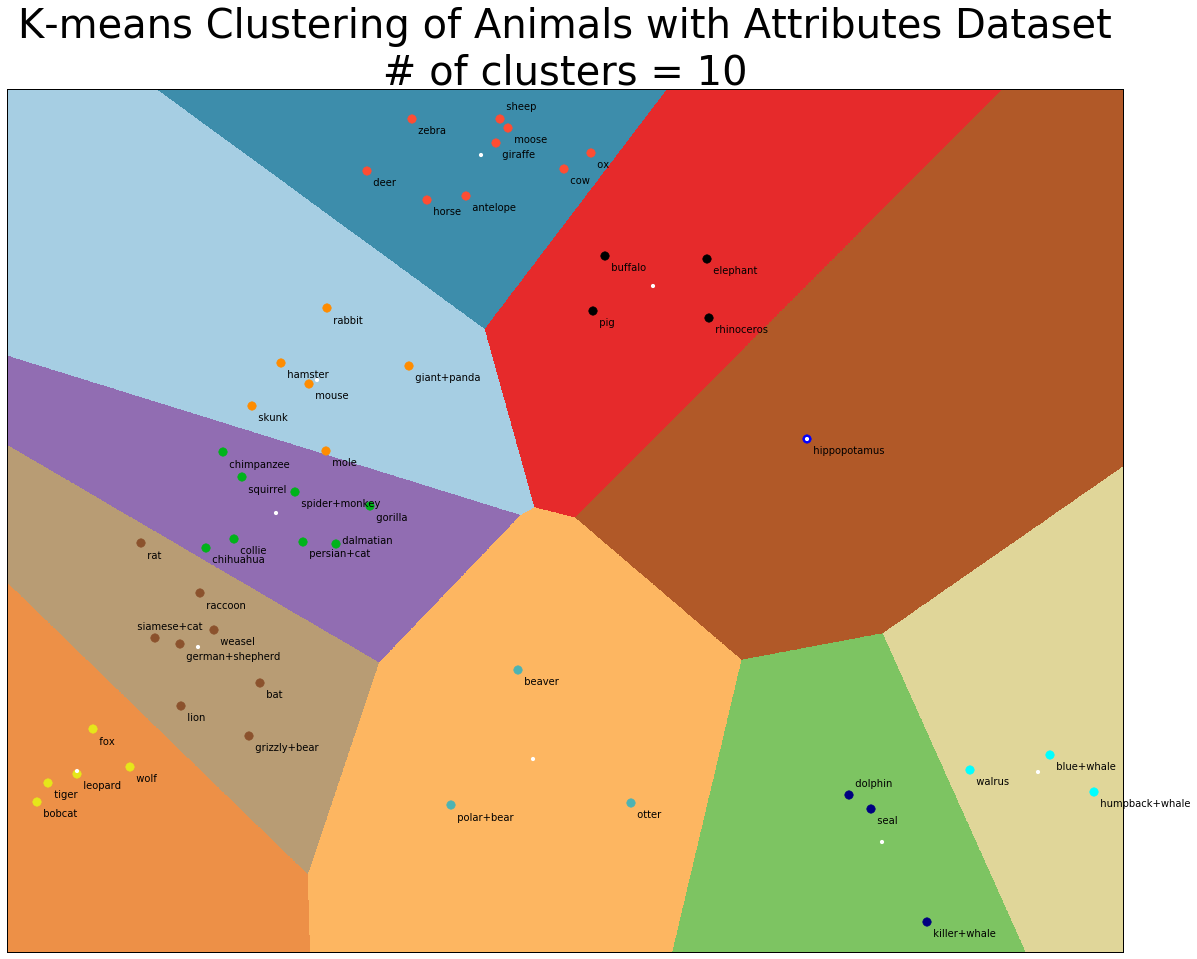

In [121]:
# Step size of the mesh. Decrease to increase the quality
h = .1     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary.
x_min, x_max = reduced_data[:, 0].min() - 10, reduced_data[:, 0].max() + 10
y_min, y_max = reduced_data[:, 1].min() - 10, reduced_data[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(20, 20))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
            origin='lower')

# Plot the centroids as a white o
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=1,
            color='w', zorder=10)

# Plot the Animals
for i,animal in enumerate(classes):
    # colors is just an array of tuples containing RGB values
    colors = [(1,.55,0),(1,.3,.2),(0,0, .5), (.545, .322, .176), (0,0, 0), (.3,.7, .7), (.9,.9, .1), (0,.7, .1), (0,1, 1), (0,0, 1)]
    plt.plot(reduced_data[i, 0], reduced_data[i, 1], color = colors[kmeans.labels_[i]], marker = '.',  markersize=17)
    if animal == 'dalmatian':
        plt.annotate('  ' + animal, xy = (reduced_data[i,0], reduced_data[i, 1]), xytext = (reduced_data[i,0], reduced_data[i, 1]), fontsize = 10)
    elif animal == 'german+shepherd':
        plt.annotate('  ' + animal, xy = (reduced_data[i,0], reduced_data[i, 1]), xytext = (reduced_data[i,0], reduced_data[i, 1]-5), fontsize = 10)
    elif animal == 'sheep' or animal == 'dolphin' :
        plt.annotate('  ' + animal, xy = (reduced_data[i,0], reduced_data[i, 1]), xytext = (reduced_data[i,0], reduced_data[i, 1]+3), fontsize = 10)
    elif animal == 'siamese+cat':
        plt.annotate('  ' + animal, xy = (reduced_data[i,0], reduced_data[i, 1]), xytext = (reduced_data[i,0] - 8, reduced_data[i, 1]+3), fontsize = 10) 
    else: 
        plt.annotate('  ' + animal, xy = (reduced_data[i,0], reduced_data[i, 1]), xytext = (reduced_data[i,0], reduced_data[i, 1]-5), fontsize = 10)
        
plt.title('K-means Clustering of Animals with Attributes Dataset\n # of clusters = 10 ', fontsize = 40)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('images/animals_attributes.png') 
plt.show()

From the clustering, it is clear that the groups that are clustered together make some intuitive sense. Water dwelling creatures are grouped close together as well as other creatures such as the various types of dogs. However, more work needs to be done to group the animals better (change algorithm, increase number of clusters etc). 

<img src = "images/Worksheet7/4.png">

<h2 align="center">Hierarchical Clustering of the Data </h2>

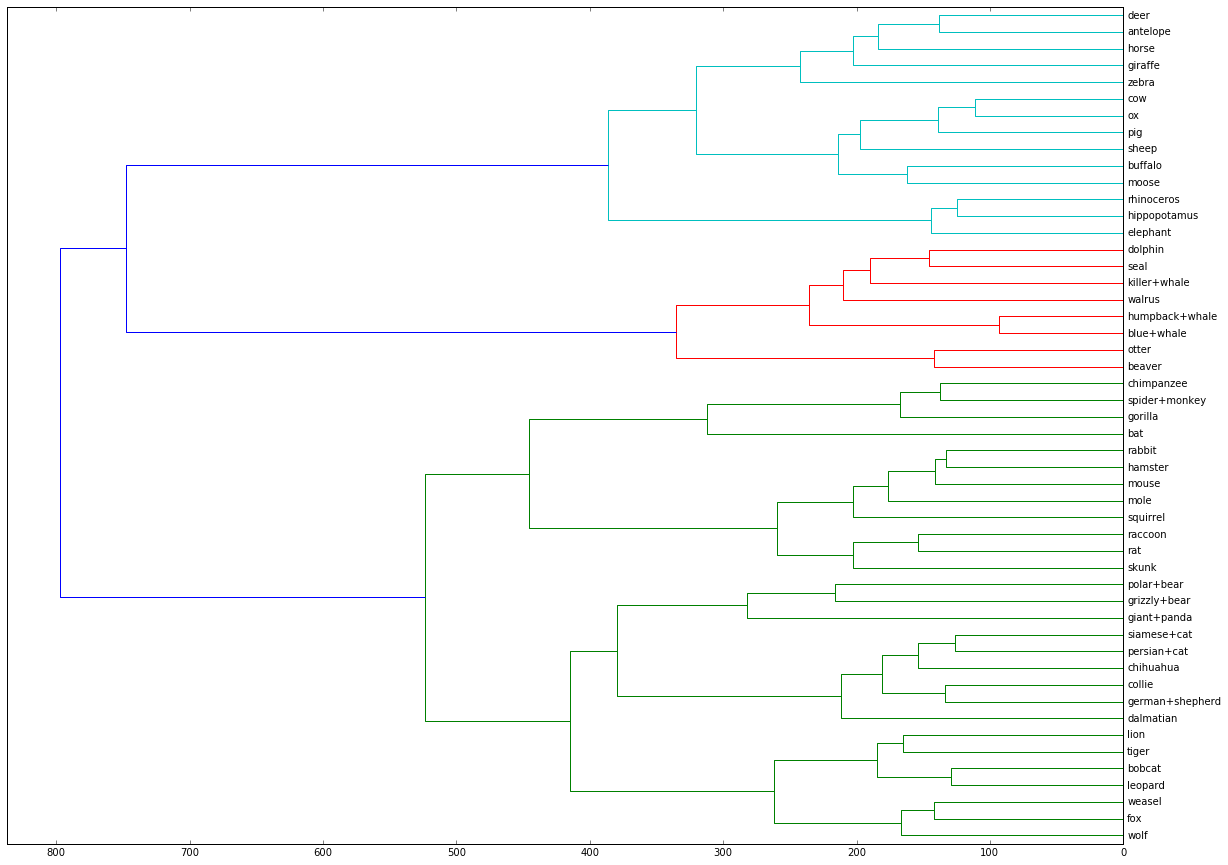

In [123]:
# cluster_link array (contains the hierarchical clustering information)
cluster_link = linkage(samples_features, method='ward');

dendrogram(cluster_link, orientation="right", labels=classes)
rcParams['figure.figsize']=[20,15]

<h2 align="center"> The clustering seems sensible to me since it 10 clusters before was arbitrary plus it seems to have made intuitive sense in grouping polar and grizzly bears together, different types of dog, and various sea dwelling creatures together. </h2>